# Data stuctures - Exercises

## Part I - Basic & Extension types

## Comprehensions & Generators

Run the following code block

In [6]:
my_list = [ _**2 for _ in range(5)]
my_dict = {_**2:_ for _ in range(5)}
my_generator = ( _**2 for _ in range(5))
# generator one time only, little memory used 

Now run each of these blocks several times

In [7]:
for i in my_list:
    print(i)

0
1
4
9
16


In [8]:
for i in my_dict:
    print(my_dict[i], my_dict)

0 {0: 0, 1: 1, 4: 2, 9: 3, 16: 4}
1 {0: 0, 1: 1, 4: 2, 9: 3, 16: 4}
2 {0: 0, 1: 1, 4: 2, 9: 3, 16: 4}
3 {0: 0, 1: 1, 4: 2, 9: 3, 16: 4}
4 {0: 0, 1: 1, 4: 2, 9: 3, 16: 4}


In [9]:
for i in my_generator:
    print(i)

0
1
4
9
16


In [11]:
print(f'{type(my_generator) = }, {type(my_list) = }' )

type(my_generator) = <class 'generator'>, type(my_list) = <class 'list'>


Can you explain why the last one behaves differently after the second time you run it?

Try using the `type` command to see the class of each of `my_list` and `my_generator`. Is this what you expected?

Generators are useful to create long sequences without using up the memory to store all the values. In a short syntax they let you create iterators to use elsewhere

One good use:

In [21]:
import numpy as np

val1 = np.array([_ for _ in range(10)]) # creates a temporary list
val2 = np.fromiter((_ for _ in range(10)),dtype=int) # just the array

In [19]:
val1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
val2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Fun with lists

We can time a function fairly accurately using a version of the `%timeit` Jupyter magic command

```python
t = %timeit -r 4 -n 100 -q -o my_func
print(t.average)
```

Here `-r` is the number of runs to do, `-n` is the number of copies, `-q` means the command doesn't print anything and `-o` generates the output.

Using the method above (or your own preferred alternative) try time the following operations:

- Append one value to a list of 5 elements
- Insert a new value to the 3rd place( i.e. index 2) in a list of 5 elements
- Remove the 3rd value in a list of 6 elements
- Using the function `fill_list` below, time how long it takes to append an element to a list for various sizes. Do you think you can spot the times when the list has to expand itself? Try plotting the run times. It's likely things won't be too obvious.
- Remove the 3rd value in a list of 600 elements.

In [47]:
def my_func1():
    x = [i for i in range(5)]
    x.append(1)

def my_func2():
    x = [i for i in range(5)]
    x.insert(2,'1')
    
def my_func3():
    x = [i for i in range(6)]
    del x[2]
    
def my_func4():
    x = [i for i in range(600)]
    del x[2]
    
def fill_list(n):
    "Fill a list with n values"
    return list(range(n))

In [39]:
#1
%timeit a = my_func1()

260 ns ± 0.984 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [40]:
#2
%timeit a = my_func2()

270 ns ± 2.33 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [41]:
%timeit a = my_func3()

255 ns ± 0.652 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [43]:
%timeit a = my_func4()

8.76 µs ± 68.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [50]:
import matplotlib.pyplot as plt

In [82]:
time = []
for i in range(1000):
    t = %timeit -r 10 -n 100 -q -o fill_list(i)
    time.append(t.average)

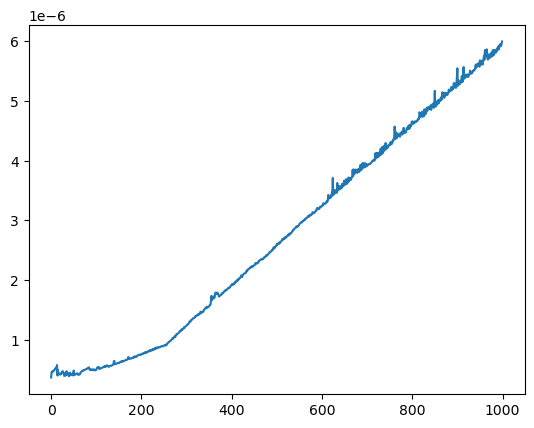

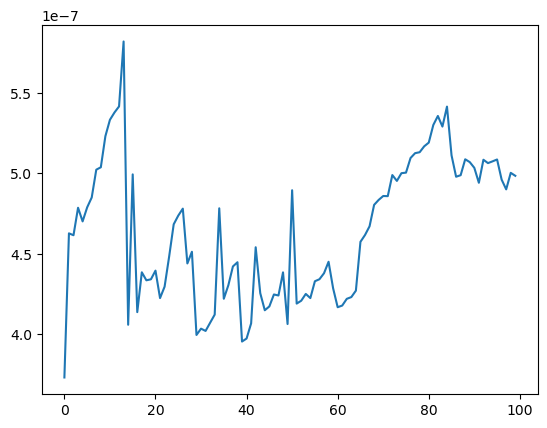

In [86]:
plt.plot(range(1000), time)
plt.show()
plt.plot(range(100), time[:100])
#从结果上看， 基本是线性增长的， 但是在最初和大了之后，波动都比较大，应该是因为?, 尤其是10,11,12,13增大很快,14 又掉下去了

## Hashes and dicts:

Python exposes its basic hash operator as `hash()`. Try applying it to the following
- An integer (e.g. 3)
- A float (e.g. 3.0)
- A string (e.g. 'Hello World')

Can you observe any difference if you put elements with the same hash

In [113]:
a = int(3)
b = float(3.0)

In [127]:
hash(b)  # hash do not tell int or float for int

3

In [123]:
# write your code here

mydict = {a:hash(a), b:hash(b),'3':hash('3')}

for i in mydict:
    print(type(i))
    
#dic automaticaly store float key as int if possible

mydict = {a:hash(a), b+0.5:hash(b+0.5),'3':hash('3')}

mydict

<class 'int'>
<class 'str'>


{3: 3, 3.5: 1152921504606846979, '3': 8330323422659526711}

### The `collections` module

The `collections` module contains a number of helpful data structures, including the `namedtuple` and `deque`.

#### `namedtuple`s

A `namedtuple` lets you quickly create a

In [131]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y', 'z'])

point1  = Point(1,2,3)
print(point1.z)
point2  = Point(z=1,x=2,y=3)
print(point2.z)
point1
# like an immutable indexed dicrtionary

3
1


Point(x=1, y=2, z=3)

Try to create a `namedtuple`  for a class called `Person`, with attributes `name` and `age`.

In [133]:
## Write your code here

Person = namedtuple('Person',['name','age'])
x = Person('Colin',22)
x

Person(name='Colin', age=22)

#### `deque`s

`deque`s are short for "double ended queues" and act like a list to which values can be added on either end.

In [138]:
from collections import deque

a = deque((1,2,3))

a.append(4)
a.appendleft(0)
print(a)

print(a.pop())
print(a.popleft())
a

deque([0, 1, 2, 3, 4])
4
0


deque([1, 2, 3])

Time how long it takes to add or pop a value on the right (`append()` or `pop()`) and on the left (`appendleft()` or `popleft()`). How does this compare to using a regular Python list.

# Using list is faster?

In [159]:
def de():
    a = deque((1,2,3))
    
def de_de_r():
    a = deque((1,2,3))
    a.pop()
    
def de_de_l():
    a = deque((1,2,3))
    a.popleft()
    
def de_ap_r():
    a = deque((1,2,3))
    a.append(4)
    
def li_ap_l():
    a = [1,2,3]
    a.insert(0,0)
    
def li_ap_r():
    a = [1,2,3]
    a.append(0)  

def li_de_l():
    a = [1,2,3]
    del a[0]
    
def li_de_r():
    a = [1,2,3]
    del a[-1]
    
def li():
    a = [1,2,3]

In [155]:
t = %timeit -r 4 -n 100 -q -o de()
tdr = %timeit -r 4 -n 100 -q -o de_de_r()
tdr = tdr.average - t.average
tdl = %timeit -r 4 -n 100 -q -o de_de_l() 
tdl = tdl.average - t.average
tar = %timeit -r 4 -n 100 -q -o de_ap_r() 
tar = tar.average - t.average
tal = %timeit -r 4 -n 100 -q -o de_ap_l() 
tal = tal.average - t.average
print(f'{tdr = },{tdl = },{tar = },{tal = }')

tdr = 9.426752512808894e-08,tdl = 7.948001439217484e-08,tar = -1.2416499885148368e-07,tal = -1.1812997399829325e-07


In [161]:
t = %timeit -r 4 -n 100 -q -o li()
ldr = %timeit -r 4 -n 100 -q -o li_de_r()
ldr = ldr.average - t.average
ldl = %timeit -r 4 -n 100 -q -o li_de_l() 
ldl = ldl.average - t.average
lar = %timeit -r 4 -n 100 -q -o li_ap_r() 
lar = lar.average - t.average
lal = %timeit -r 4 -n 100 -q -o li_ap_l() 
lal = lal.average - t.average
print(f'{ldr = },{ldl = },{lar = },{lal = }')

ldr = 6.698246579617259e-08,ldl = 6.729498636559585e-08,lar = -1.8227510736323907e-08,lal = 3.4374897950328865e-09


## Part II - Classes


### Operator Overloading

Try to write your own class to implement a [complex number](https://wikipedia.com/Complex_numbers) (note that Python alreay implements complex numbers as `complex(1,2)` or 1+2j, so this isn't something you would need to do  in live code).

You will need to store two `float` values, one to store the real part of the number, and one to store the imaginary part, and write the `__init__` routine to store them. If you call them `real` and `imag` then your new class will be more interoperable with the builtin one.

The rules for arithmatic for two complex numbers, $z_1 = x_1 + i y_1$ and $z_2 = x_2+iy_2$ are:
$$z_1+z_2 = x_1+x_2 +i \left(y_1+y_2\right)$$
$$z_1-z_2 = x_1-x_2 +i \left(y_1-y_2\right)$$
$$z_1\times z_2 = x_1\times x_2-y_1\times y_2 +i \left(x_1\times y_2+x_2\times y_1\right)$$
$$\frac{z_1}{z_2} = \frac{x_1\times x_2+y_1\times y_2 +i \left(x_2\times y_1-x_1\times y_2\right)}{x_2^2+y_2^2}$$

can you implement these via overloading? What happens if you try to add a normal (i.e. real) float as $z_1+x_2$ or $x_2 + z_1$? If you have time, can you fix this?

In [244]:
class Cn:
    def __init__(self,r,i):
        self.r = r
        self.i = i
        
    def __add__(self,cn):
        if type (cn) == type(self):  
            return Cn(self.r + cn.r,self.i + cn.i)
        else:
            return Cn(self.r+cn,self.i)
        
    def __sub__(self,cn):
        if type (cn) == type(self): 
            return Cn(self.r - cn.r,self.i - cn.i)
        else:
            return Cn(self.r - cn,self.i)
    
    def __mul__(self,cn):
        if type (cn) == type(self): 
            return Cn( self.r*cn.r - self.i*cn.i , self.r*cn.i + self.i*cn.r)
        else:
            return Cn(self.r*cn,self.i*cn)
        
    def __truediv__(self,cn):
        if type (cn) == type(self): 
            return Cn((self.r*cn.r + self.i*cn.i)/(cn.i**2 + cn.r**2), (cn.r*self.i - self.r*cn.i)/(cn.i**2 + cn.r**2))
        else:
            return Cn(self.r/cn, self.i/cn)
        
    def __str__(self):
        return f'{self.r} + {self.i}i'

In [237]:
a = Cn(2,1)
b = Cn(1,2)
c = a + b
print(c)
c = a - b
print(c)
c = a * b
print(c)
c = a/b
print(c)

3 + 3i
1 + -1i
0 + 5i
0.8 + -0.6i


In [247]:
a = Cn(2,1)
b = 3
c = a + b
print(c)
c = a - b
print(c)
c = a * b
print(c)
c = a/b
print(c)
# print(f'{c:.2f}')

5 + 1i
-1 + 1i
6 + 3i
0.6666666666666666 + 0.3333333333333333i
